# Linear Regression Implementation using Ordinary Least Square in NumPy

#### In the [previous article,](https://nandeshwar.in/100-days-of-deep-learning/what-is-linear-regression-with-derivation/) we had derived the formula for Univariate Linear Regression which is

$$
Y = \beta_{0} + \beta_{1}X \tag{1}
$$

where 

$$
\beta_{1}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}} \tag{2}
$$

and

$$
\beta_{0}=\bar{y}-\beta_{1} \bar{x} \tag{3}
$$

Now let us use the same to find the best fit line.

Check out this article on my blog [100 Days of Deep Learning](https://nandeshwar.in/100-days-of-deep-learning/linear-regression-from-scratch-using-numpy/).

## Create dataset
In order to apply Linear Regression, we need a dataset. We use amazing Sklearn library to create this dataset

Let us first import all the needed libraries

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

Now we create a dataset with just 1 feature of 100 samples and visualise the same

Text(0, 0.5, 'y')

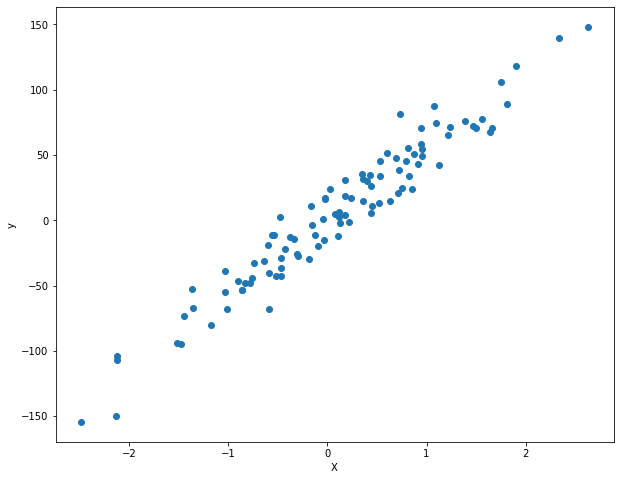

In [2]:
# Generate dataset for regression with singl feature
X, y = make_regression(n_samples=100, n_features=1, noise=15.0, random_state=6)

fig = plt.figure(figsize=(10,8))

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")

In [3]:
# Helper function to plot line on graph
def plot_line(ax, slope, intercept, *args, **kwargs):
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + (slope * x_vals)
    ax.plot(x_vals, y_vals , *args, **kwargs)

Now in order to use equation 1 mentioned above we need to calculate $\beta_{0}$ and $\beta_{1}$. Equations for calculating both of them is mentioned on the top which we derived in the [previous article](https://nandeshwar.in/100-days-of-deep-learning/what-is-linear-regression-with-derivation/).

We first calculate mean of both X and y ie $\bar{X}$ and $\bar{y}$ respectively. And then we do the vector calculation using the same for **equation 2**.

In [4]:
mean_x = np.mean(X)
mean_y = np.mean(y)

# from equation 2
b1 = sum(np.dot((X-mean_x).T, y-mean_y))/sum(np.square(X-mean_x))

# from equation 3
b0 = mean_y - b1 * mean_x

print(f"b0:{b0} b1:{b1}")

b0:[-0.22071127] b1:[55.63351962]


#### Now we have values for both $\beta_{0}$ and $\beta_{1}$. Let us plot this to see how it performs on our dataset

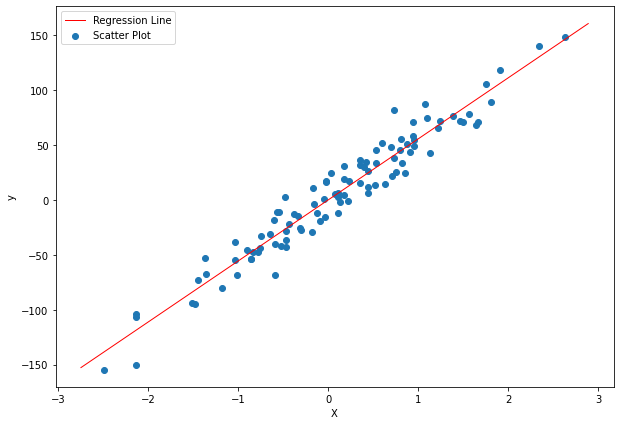

In [5]:
ax = plt.gca()
x_min, x_max = min(X), max(X)
y_min, y_max = min(y), max(y)
ax.scatter(X, y, label='Scatter Plot')

plot_line(ax, b1[0], b0[0], *['r'], **{'linewidth': 1, 'label': 'Regression Line'})
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Voila!

## Scikit Learn Implementation
Now let us implement the same algorithm using sklearn library

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
model = LinearRegression()
model.fit(X, y)

# Y Prediction
y_pred = model.predict(X)

In [8]:
model.score(X, y)

0.9380085983573465

In [9]:
model.intercept_, model.coef_

(-0.22071126775203442, array([55.63351962]))

We can see that intercept and coefficient calculated by Sklearn are exactly as the values calulated by our NumPy model above.

In [10]:
# Calculating RMSE and R2 Score
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2_score = model.score(X, y)

print('RMSE = ', np.sqrt(mse))
print('R2 Score =', r2_score)

RMSE =  14.230445772845755
R2 Score = 0.9380085983573465
